In [1]:
import pymaid
import matplotlib.pyplot as plt

rm = pymaid.CatmaidInstance('server_url','http_user','http_pw','token')

nl = pymaid.get_neurons('annotation:glomerulus DA1 right excitatory')

INFO  : Found 8 skeletons with matching annotation(s) (pymaid)


In [2]:
nl.reroot(nl.soma, inplace=True)

In [3]:
cut = pymaid.cut_neuron(nl[0], 'SCHLEGEL_LH')
cut

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57354 GA,57353,933,230,22,23,0,266.027316,NA,False
1,PN glomerulus DA1 57354 GA,57353,3966,96,68,73,53,847.129366,NA,True


In [4]:
# Change skeleton ID of one of the fragments
cut[0].skeleton_id = '123456'

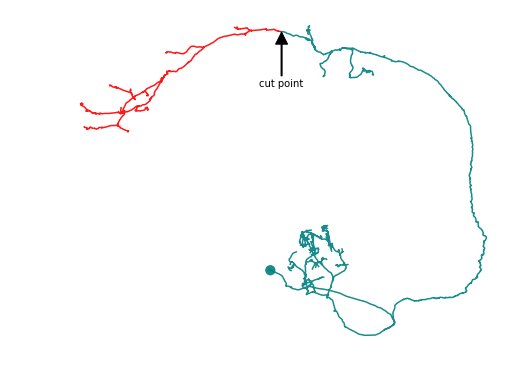

In [5]:
# Plot neuron fragments
fig, ax = pymaid.plot2d(cut, connectors=False, linewidth=1.5)

# Annotate cut point
cut_coords = nl[0].nodes.set_index('treenode_id').loc[ nl[0].tags['SCHLEGEL_LH'], ['x','y'] ].values[0]
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

In [6]:
cut = nl.prune_proximal_to('SCHLEGEL_LH', inplace=False)
cut.head()

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57354 GA,57353,933,230,22,23,0,266.027316,NA,False
1,PN glomerulus DA1 27296 BH,27295,1740,304,62,63,4,337.380261,NA,False
2,PN glomerulus DA1 57312 LK,57311,828,300,30,32,1,250.596248,NA,False
3,PN glomerulus DA1 57316 ML 2863105,2863104,1197,293,50,55,5,275.458755,NA,False
4,PN glomerulus DA1 57382 ML,57381,928,224,27,29,0,228.878529,NA,False


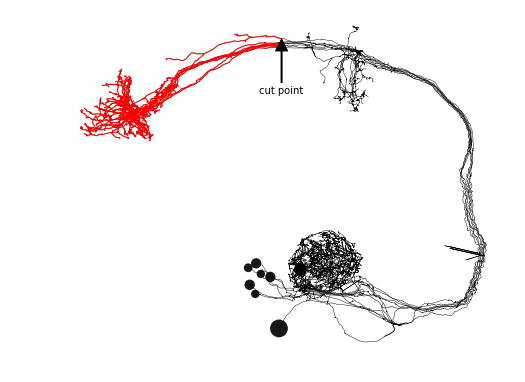

In [7]:
# Plot whole neurons first
fig, ax = pymaid.plot2d(nl, connectors=False, linewidth=.5, color='k')

# Add pruned branches in red
fig, ax = pymaid.plot2d(cut, connectors=False, linewidth=1, color='r', ax=ax)

# Annotate cut point
cut_coords = nl[0].nodes.set_index('treenode_id').loc[ nl[0].tags['SCHLEGEL_LH'], ['x','y'] ].values[0]
ax.annotate('cut point', xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

In [8]:
branch_points = nl[0].nodes[nl[0].nodes.type=='branch'].treenode_id.values

cut = pymaid.cut_neuron(nl[0], branch_points)
cut.head()                        

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57354 GA,57353,20,13,0,2,0,4.189930,NA,False
1,PN glomerulus DA1 57354 GA,57353,10,8,0,2,1,2.646405,NA,False
2,PN glomerulus DA1 57354 GA,57353,80,28,0,2,0,14.760008,NA,False
3,PN glomerulus DA1 57354 GA,57353,67,14,0,2,1,16.042144,NA,False
4,PN glomerulus DA1 57354 GA,57353,19,7,0,2,0,2.950178,NA,False


In [9]:
# Change the skeleton IDs, to prevent a big mess
for i, n in enumerate(cut):
    n.skeleton_id = str(i)

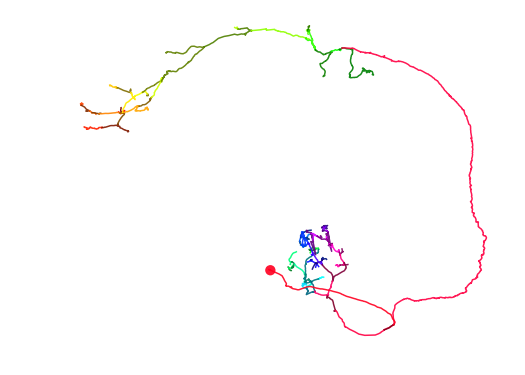

In [10]:
# Plot neuron fragments
fig, ax = pymaid.plot2d(cut, connectors=False, linewidth=1.5)

plt.show()